## Description

This is testing to see if we get the same (or similar) results to CNN_6_1 using CNN_5_0 data: Combined/LaFleur_supp.csv. It does not use the absolute Observed log(TX/Txref) as tested in CNN_6_1_2.

In [6]:
from CNN_6_1_1 import *

In [7]:
# Documentation variables
name = 'CNN_6_1_1'
model_path = f'../Models/{name}.keras'
data_path = '../Data/Combined/LaFleur_supp.csv'
search_dir = '../Testing CNN/Hyperparameter Search'

# Hyperparameter tuning variables
max_trials = 30

# Unoptimized training Hyperparameters
loss = 'mean_squared_error'
epochs = 100
batch_size = 32

# Hyperparameter ranges dictionary
hyperparam_ranges = {
    'num_layers': (1, 3),
    'filters': [32, 64, 128],
    'kernel_size': [3, 4, 5],
    'strides': [1, 2],
    'pool_size': [2, 3],
    'activation': ['relu', 'tanh'],
    'dense_units': (32, 128, 32),
    'learning_rate': (1e-4, 1e-2)
}

In [8]:
X, y = load_features(data_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Perform Bayesian Optimization
best_model = train_best_model(name, search_dir, X_train, y_train, X_test, y_test,
                                X_train.shape[1:], loss, max_trials, epochs, batch_size, hyperparam_ranges)

# Save the best model
best_model.save(model_path)

Trial 30 Complete [00h 09m 19s]
val_loss: 0.002604299457743764

Best val_loss So Far: 0.0022212816402316093
Total elapsed time: 03h 34m 09s


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [11]:
# Load, predict, and evaluate the best model
y_pred = load_and_predict(model_path, X_test)
mse, rmse, mae, r2 = calc_metrics(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
MSE:  0.002221281131135401
RMSE:  0.04713046924374296
MAE:  0.030140969377244788
R2:  0.8823070845764398


In [19]:
print(min(y_pred['Value']), max(y_pred['Value']))

0.23983719944953918 0.9571085572242737


   1/1524 ━━━━━━━━━━━━━━━━━━━━ 2:48 111ms/step

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


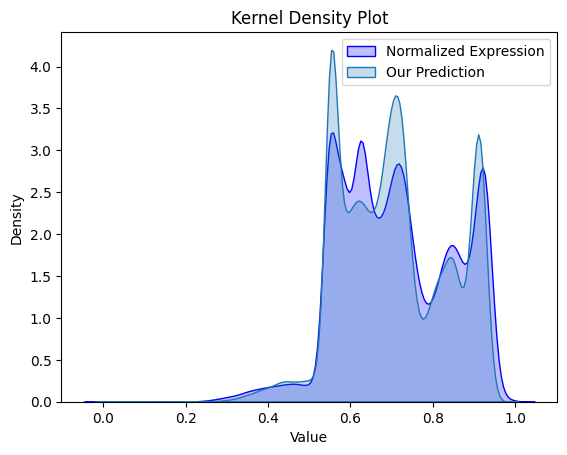

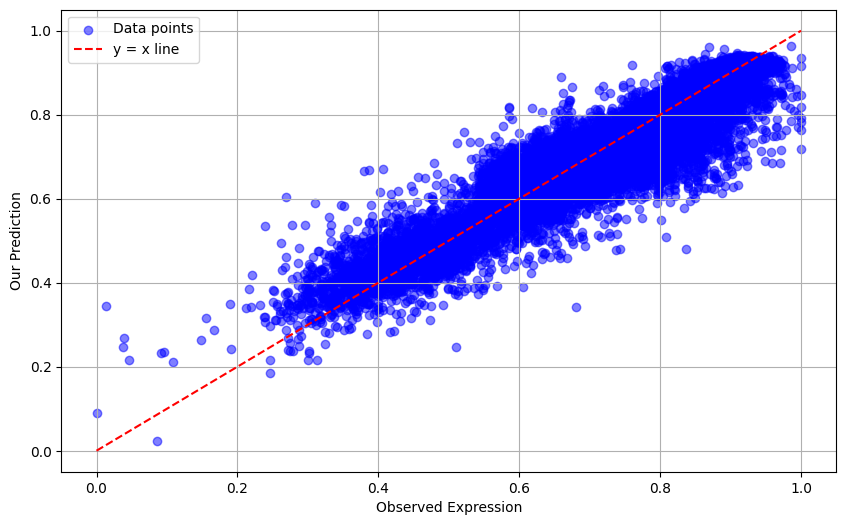

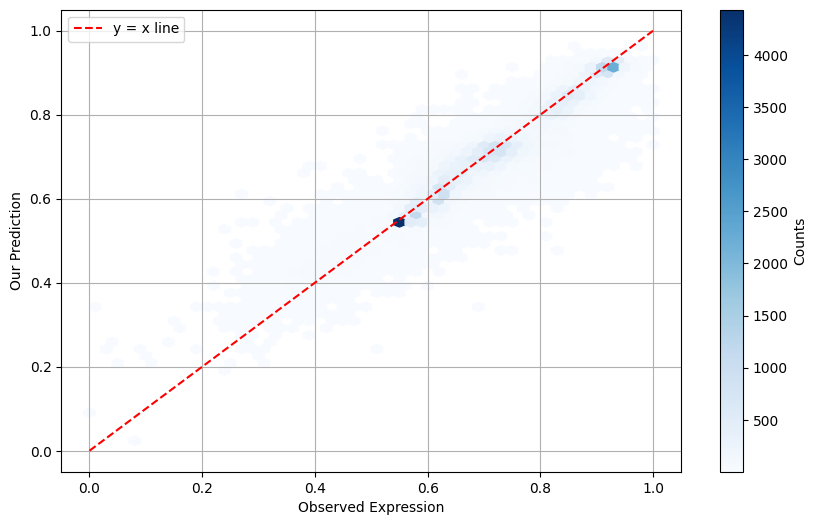

In [18]:
df = pd.read_csv(data_path)
df['Normalized Expression'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']])

predicted = load_and_predict(model_path, X)
observed = df['Normalized Expression'].values

plot_kde(df, predicted)
plot_scatter(observed, np.ravel(predicted))
plot_hexbin(observed, np.ravel(predicted))